# Tesseract_test

Optical character recognition

* install Tesseract-OCR for windows https://tesseract-ocr.github.io/
* add Tesseract-OCR to system environment - path
* add tessdata to system variables as TESSDATA_PREFIX
* install pytesseract

In [1]:
# pip install pytesseract

In [2]:
from PIL import Image
import pytesseract as pt

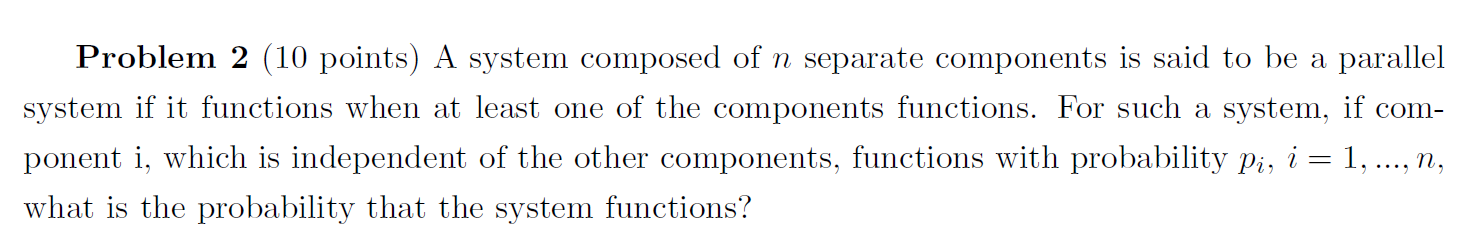

In [3]:
img1 = Image.open("images/image1.png")
img1

In [4]:
ques1 = pt.image_to_string(img1)
print(ques1)

Problem 2 (10 points) A system composed of n separate components is said to be a parallel
system if it functions when at least one of the components functions. For such a system, if com-
ponent i, which is independent of the other components, functions with probability p;, i = 1,...,n,

what is the probability that the system functions?


Question 1: subscript goes wrong

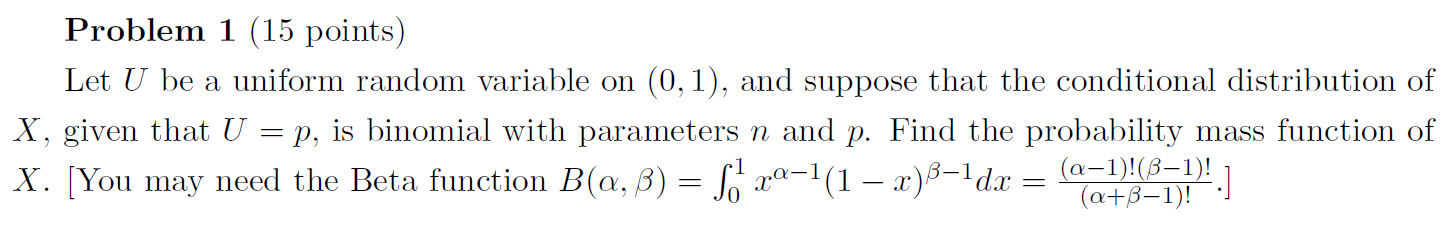

In [5]:
img2 = Image.open("images/image2.png")
img2

In [6]:
ques2 = pt.image_to_string(img2, lang = 'eng+grc' )
print(ques2)

Problem 1 (15 points)
Let U be a uniform random variable on (0,1), and suppose that the conditional distribution of

X, given that U = p, is binomial with parameters n and p. Find the probability mass function of

X. [You may need the Beta function B(a, 3) = ie we —a@)8 da = ee


Question 2: Greek letters and mathematics symbols cannot show

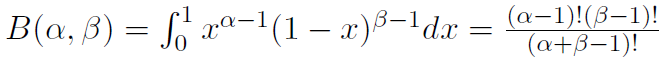

In [7]:
img3 = Image.open("images/image3.png")
img3

In [8]:
ques3 = pt.image_to_string(img3, lang = "equ")
print(ques3)

≓ ∅∠⋆↕∣ ≓↥∃
∂≼⊄⊃∠≖ ⋟∶∫⋤⊐↕⊈∠⊢↕≼↕≓⊈⋟∠∃ ↕∁∅⊈∶ ⊪


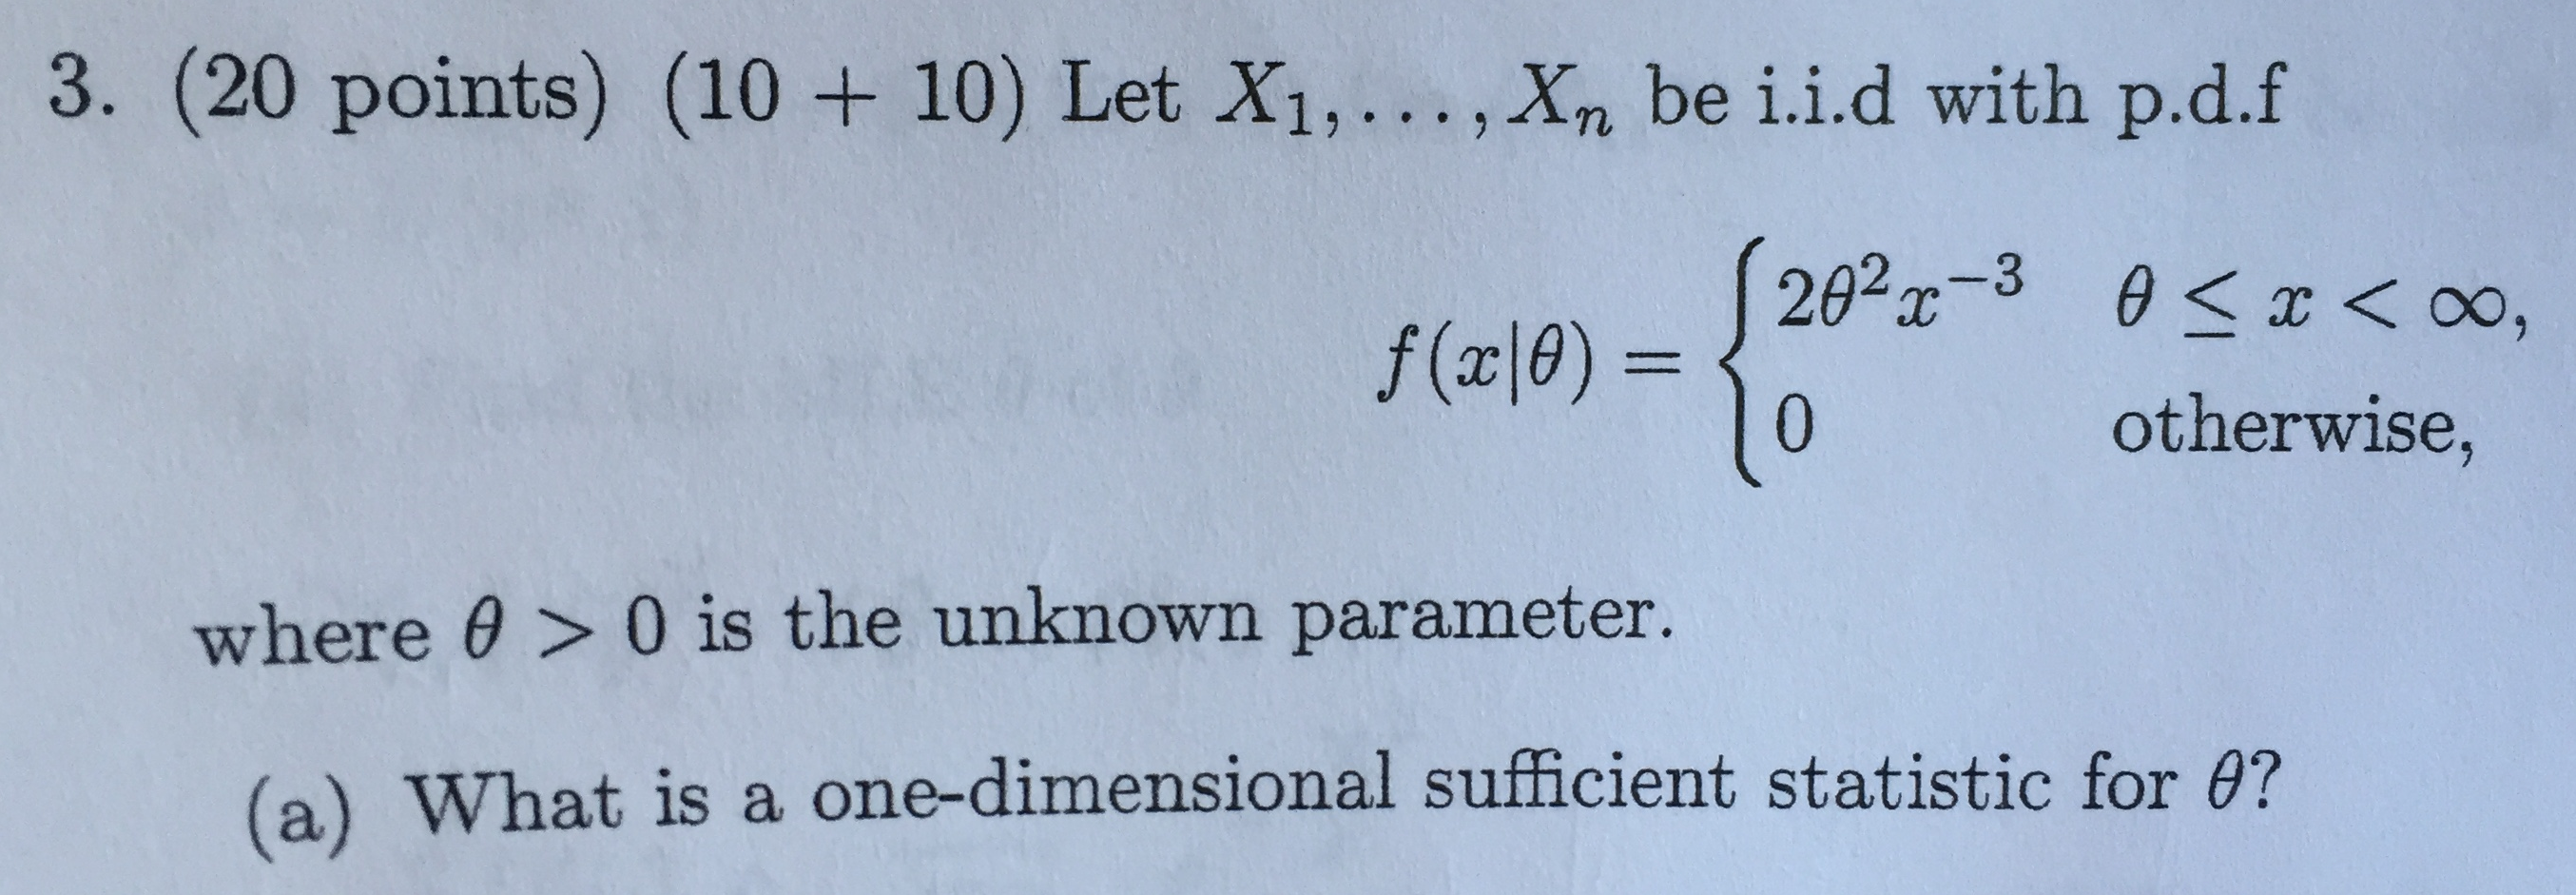

In [9]:
img5 = Image.open("images/image5.png")
img5

In [10]:
ques5 = pt.image_to_string(img5, lang = "eng+equ")
print(ques5)

3. (20 points) (10 + 10) Let Xj,...,X, be ii.d with p.d.f

202* §5 a 2 ae

0 otherwise,

f(z|@) =

where 6 > 0 is the unknown parameter.

(a) What is a one-dimensional sufficient statistic for 0?


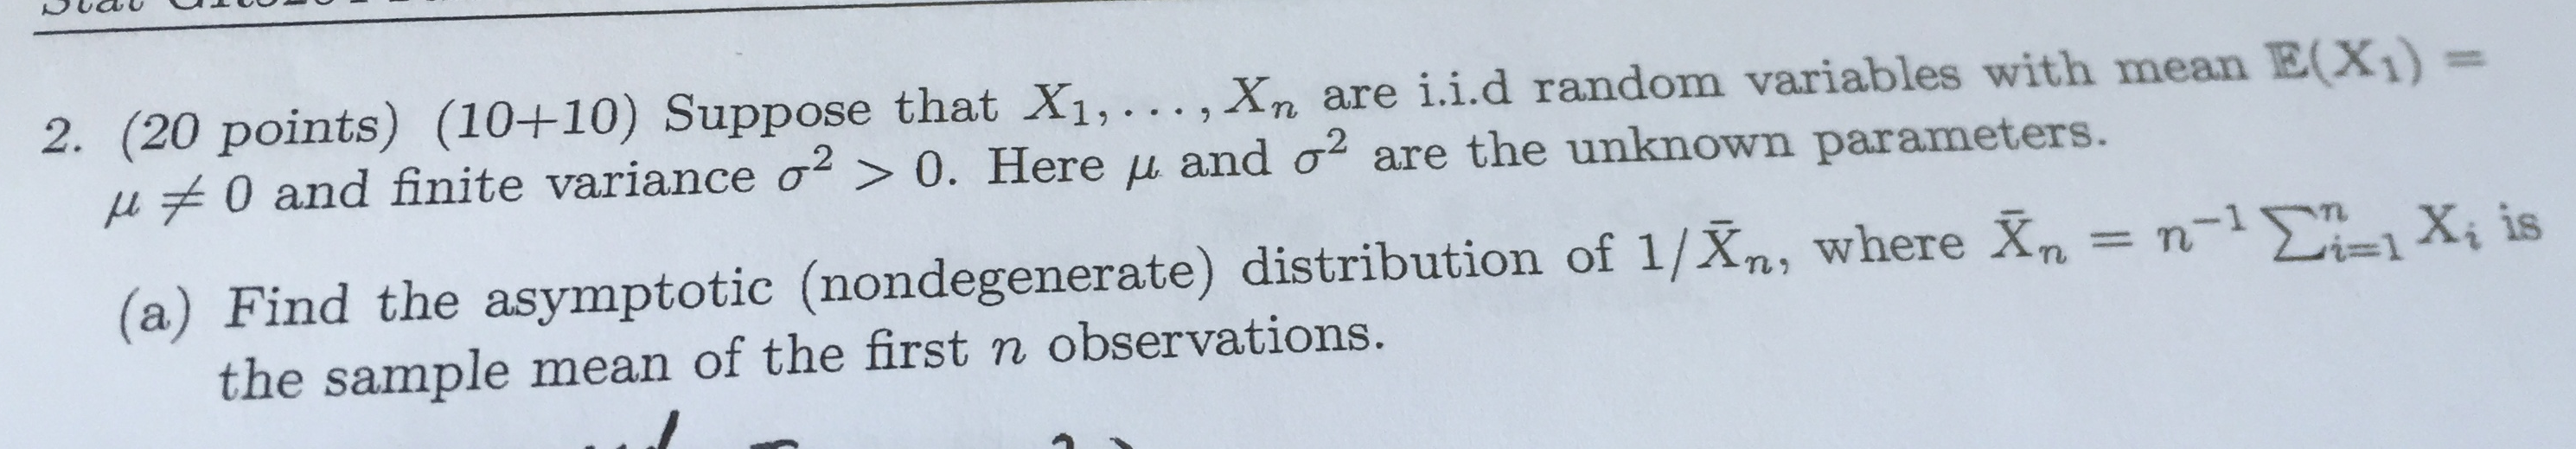

In [11]:
img6 = Image.open("images/image6.png")
img6

In [12]:
ques6 = pt.image_to_string(img6, lang = "eng+equ")
print(ques6)

ca aS

2. {20 points) (10+10) Suppose that Xa.o« kh eee LQ random variables with mean E(X4) =
yu ~ 0 and finite variance a2 > 0. Here p and o2 are the unknown parameters.

ymptotic (nondegenerate) distribution of 1/Xn, where X, = 0 wr a

(a) Find the as
f the first n observations.

the sample mean oO

ag ae an


Question 6: We need a select tool

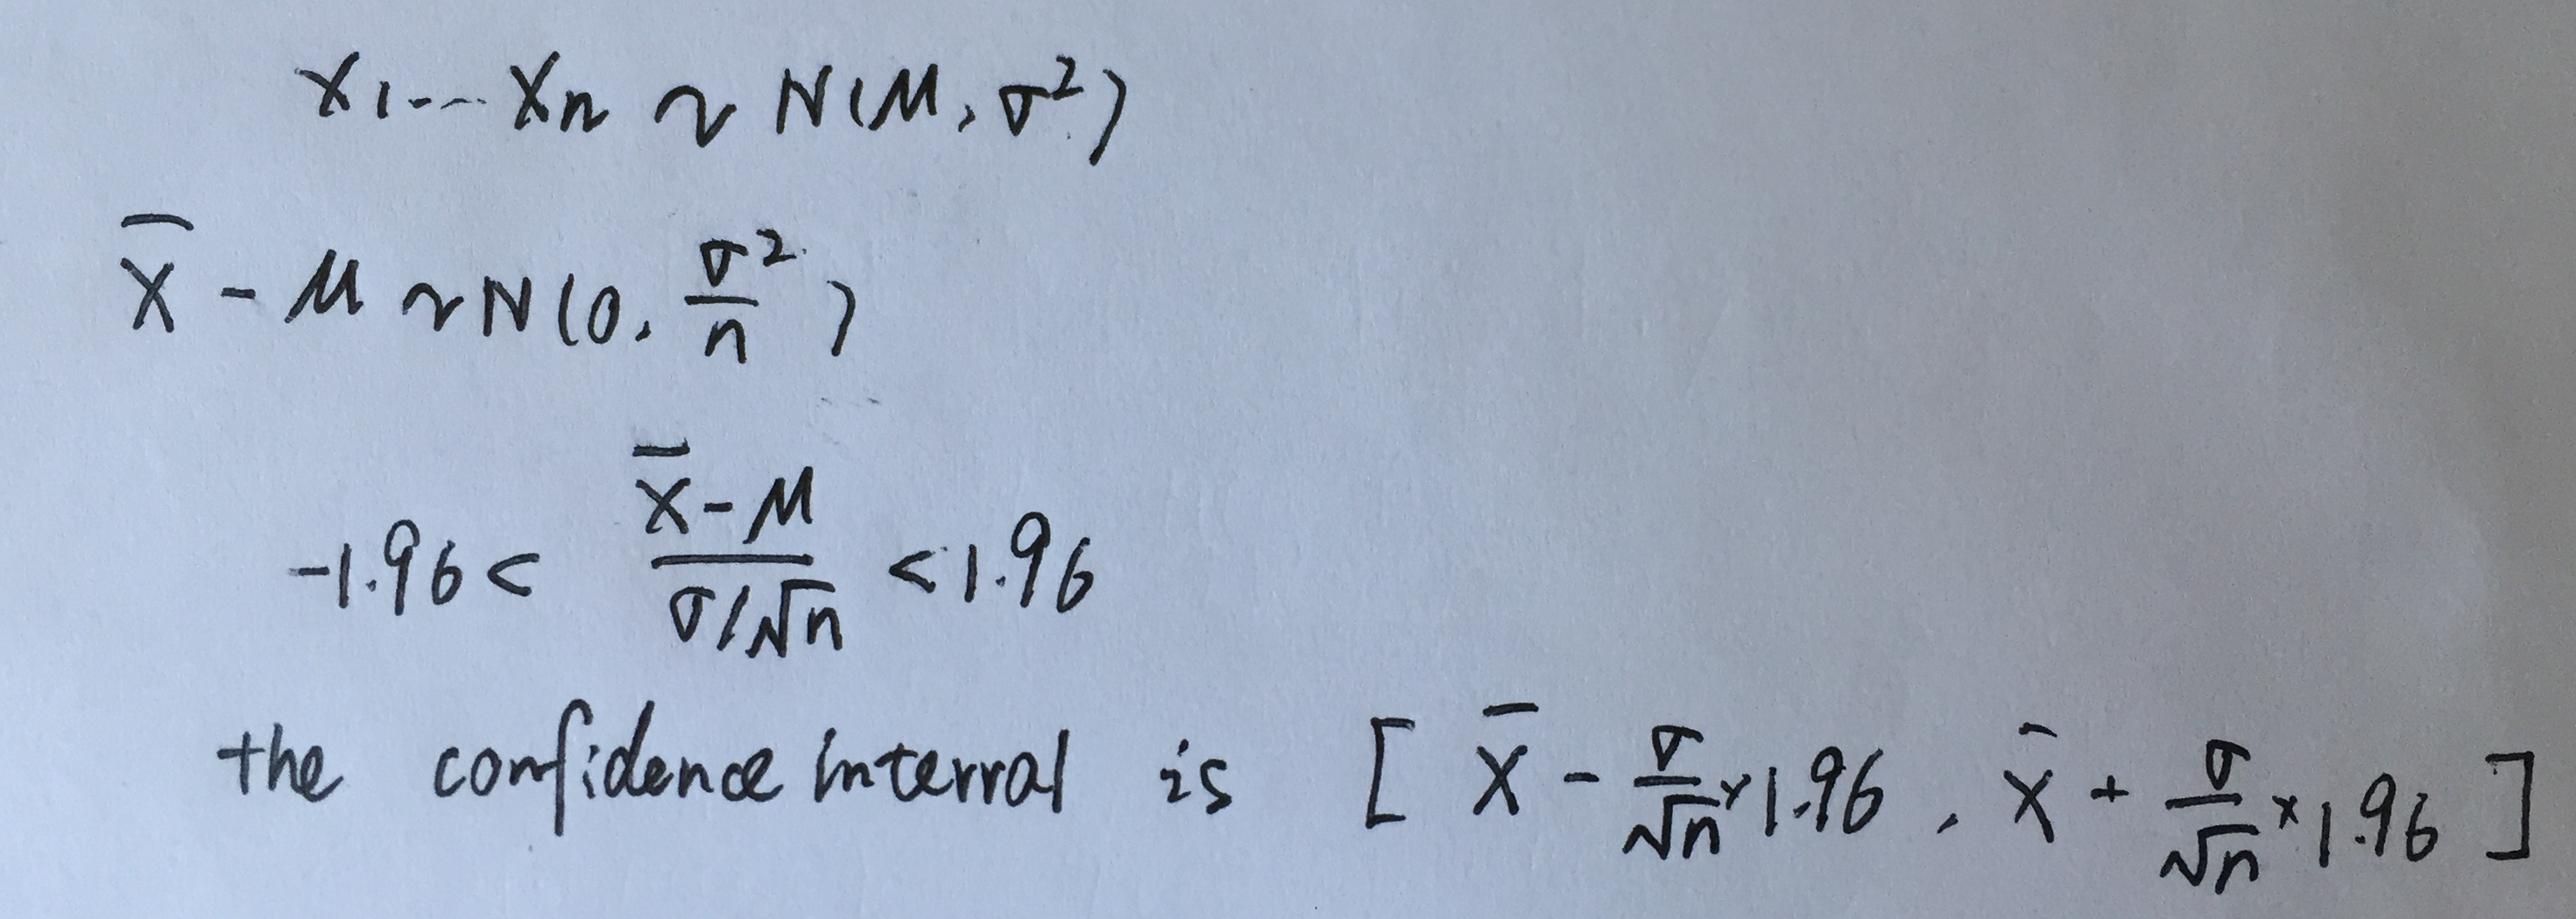

In [13]:
img7 = Image.open("images/image7.png")
img7

In [14]:
ques7 = pt.image_to_string(img7, lang = "eng")
print(ques7)

Question 7: Cannot recognize handwriting.

In [15]:
ques = [ques1, ques2, ques5, ques6]
ques


['Problem 2 (10 points) A system composed of n separate components is said to be a parallel\nsystem if it functions when at least one of the components functions. For such a system, if com-\nponent i, which is independent of the other components, functions with probability p;, i = 1,...,n,\n\nwhat is the probability that the system functions?',
 'Problem 1 (15 points)\nLet U be a uniform random variable on (0,1), and suppose that the conditional distribution of\n\nX, given that U = p, is binomial with parameters n and p. Find the probability mass function of\n\nX. [You may need the Beta function B(a, 3) = ie we —a@)8 da = ee',
 '3. (20 points) (10 + 10) Let Xj,...,X, be ii.d with p.d.f\n\n202* §5 a 2 ae\n\n0 otherwise,\n\nf(z|@) =\n\nwhere 6 > 0 is the unknown parameter.\n\n(a) What is a one-dimensional sufficient statistic for 0?',
 'ca aS\n\n2. {20 points) (10+10) Suppose that Xa.o« kh eee LQ random variables with mean E(X4) =\nyu ~ 0 and finite variance a2 > 0. Here p and o2 are the

## Other OCR tools

* i2ocr
http://www.i2ocr.com/free-online-math-equation-ocr

    very bad....

* mathpixOCR
https://mathpix.com/ocr

    commercial

* SESHAT
http://cat.prhlt.upv.es/mer/

    C++


# One hot encoding

In [15]:
import numpy as np
import pandas as pd

In [16]:
# Initial concepts list
Concepts_list = ["quesID",
                 "random variable", 
                 "conditional probability", 
                 "bayes' theorem", 
                 "normal distribution"]


In [17]:
Questions_concepts_mat = pd.DataFrame(columns = Concepts_list)
Questions_concepts_mat

Empty DataFrame
Columns: [quesID, random variable, conditional probability, bayes' theorem, normal distribution]
Index: []

In [18]:
# Match question with concepts list
def match(ques, Concepts_list):
    tags = []
    for i in range(len(Concepts_list)):
        if ques.find(Concepts_list[i]) > 0:
            tags.append(Concepts_list[i])
    return(tags)

# Add question to the questions-concepts matrix
def add_question(quesID, ques, Questions_concepts_mat):
    Concepts_list = Questions_concepts_mat.columns[1:]
    tags = match(ques, Concepts_list)
    ques_concepts = np.zeros(len(Concepts_list))
    for i in range(len(tags)):
        ques_concepts = np.where(Concepts_list == tags[i], 1, ques_concepts)
    
    if quesID in np.array(Questions_concepts_mat["quesID"]):
        if (Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] == ques_concepts).values.all():
            print("The question is already included.")
        else:
            Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] = ques_concepts
            print("The question is updated.")
            
    else:
        Questions_concepts_mat.loc[len(Questions_concepts_mat), "quesID"] = quesID
        Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] = ques_concepts
        print("The question is added.")
    
    return(Questions_concepts_mat)

In [19]:
Questions_concepts_mat = add_question(quesID = "0001",
                                        ques = ques1, 
                                        Questions_concepts_mat = Questions_concepts_mat)
Questions_concepts_mat

The question is added.


quesID random variable conditional probability bayes' theorem  \
0   0001               0                       0              0   

  normal distribution  
0                   0

In [20]:
Questions_concepts_mat = add_question(quesID = "0002",
                                        ques = ques2, 
                                        Questions_concepts_mat = Questions_concepts_mat)
Questions_concepts_mat

The question is added.


quesID random variable conditional probability bayes' theorem  \
0   0001               0                       0              0   
1   0002               1                       0              0   

  normal distribution  
0                   0  
1                   0

In [21]:
# Add concept function
def add_concept(con, Questions_concepts_mat):
    if con in np.array(Questions_concepts_mat.columns):
        print("The concept is already included.")
    else:      
        Questions_concepts_mat[con] = np.zeros(len(Questions_concepts_mat))
        print("The concept is added.")
    return(Questions_concepts_mat)


In [22]:
Questions_concepts_mat = add_concept(con = "probability",
                                     Questions_concepts_mat = Questions_concepts_mat)
Questions_concepts_mat

The concept is added.


quesID random variable conditional probability bayes' theorem  \
0   0001               0                       0              0   
1   0002               1                       0              0   

  normal distribution  probability  
0                   0          0.0  
1                   0          0.0

In [23]:
# Question 1
Questions_concepts_mat = add_question(quesID = "0001",
                                        ques = ques1, 
                                        Questions_concepts_mat = Questions_concepts_mat)
Questions_concepts_mat

The question is updated.


quesID random variable conditional probability bayes' theorem  \
0   0001               0                       0              0   
1   0002               1                       0              0   

  normal distribution  probability  
0                   0          1.0  
1                   0          0.0

In [24]:
# Question 2
Questions_concepts_mat = add_question(quesID = "0002",
                                        ques = ques2, 
                                        Questions_concepts_mat = Questions_concepts_mat)
Questions_concepts_mat

The question is updated.


quesID random variable conditional probability bayes' theorem  \
0   0001               0                       0              0   
1   0002               1                       0              0   

  normal distribution  probability  
0                   0          1.0  
1                   0          1.0

More databases:
* The relationship among concepts
* The meaning of each concept
* More information for each question
* ...